---
## Importing Libraries
---
In this section, we import the necessary Python libraries for data manipulation and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---
## Data Collection
---

The data is loaded from the provided CSV file.

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


---
## Data Preprocessing
---
### 1. Basic Cleaning

The column Unnamed: 0 was removed as it represents an auto-generated index and does not carry any financial or temporal information.

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


### 2. Handling Missing Values

In [5]:
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

The results indicates that there are no missing values present in the
dataset at this stage. Hence, no imputation or removal of rows is
required during this step.

### 3. Handling Duplicate Values

In [6]:
df.duplicated().sum()

np.int64(0)

The duplicate check confirms that no duplicate records are present in
the dataset. Therefore, no further action was required in this step.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   timestamp    72946 non-null  object 
 7   crypto_name  72946 non-null  object 
 8   date         72946 non-null  object 
dtypes: float64(6), object(3)
memory usage: 5.0+ MB


### 4. Data Type & Time-Series Validation

In [8]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values(by=["crypto_name", "date"], inplace=True)
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
44644,0.000000,0.516571,0.000000,0.516571,0.000000,0.000000e+00,2020-10-02T23:59:59.999Z,Aave,2020-10-02
44709,0.523836,65.305938,0.523801,53.151488,0.000000,0.000000e+00,2020-10-03T23:59:59.999Z,Aave,2020-10-03
44780,53.179858,55.070355,50.688990,52.675035,0.000000,0.000000e+00,2020-10-04T23:59:59.999Z,Aave,2020-10-04
44826,52.675035,55.112358,49.787900,53.219243,0.000000,8.912813e+07,2020-10-05T23:59:59.999Z,Aave,2020-10-05
44843,53.291969,53.402270,40.734578,42.401599,583091.459763,7.101144e+07,2020-10-06T23:59:59.999Z,Aave,2020-10-06


Before performing any time-series analysis, the dataset was examined to
ensure that all columns have appropriate data types. This step is crucial
for enabling chronological sorting and rolling window calculations.

The date column was converted into datetime format, and the dataset was
sorted by cryptocurrency name and date. This ensures that each
cryptocurrency’s historical records are ordered correctly and prevents
data leakage across time during feature engineering and modeling.

---
# Exploratory Data Analysis (EDA)
---

### Dataset Overview

In [9]:
df.describe()

,open,high,low,close,volume,marketCap,date
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


### 1. Price Trend Analysis

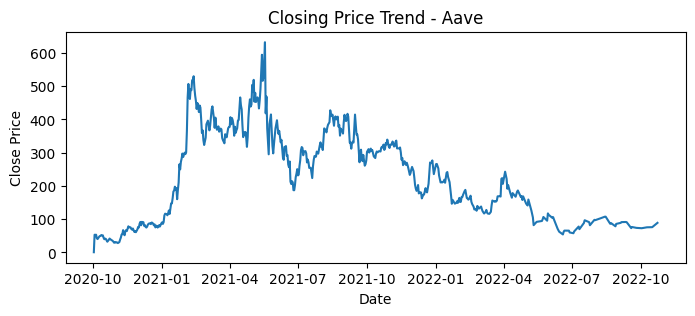

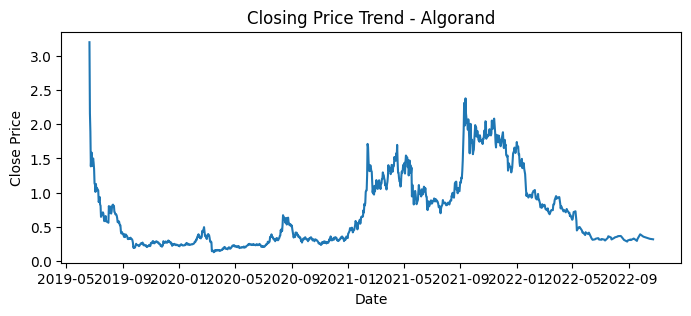

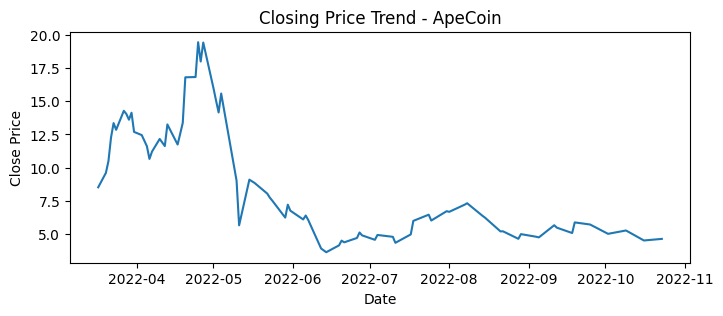

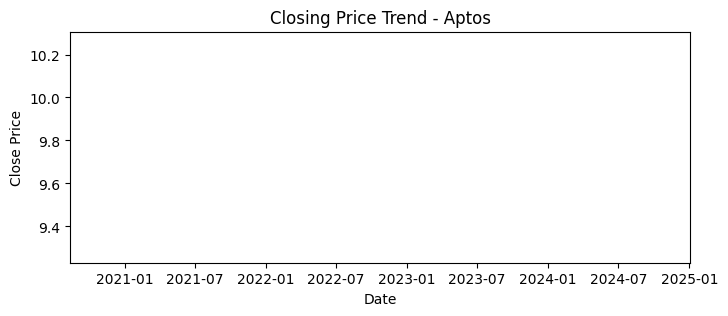

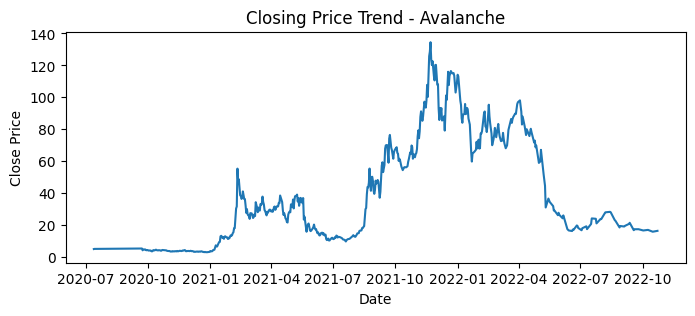

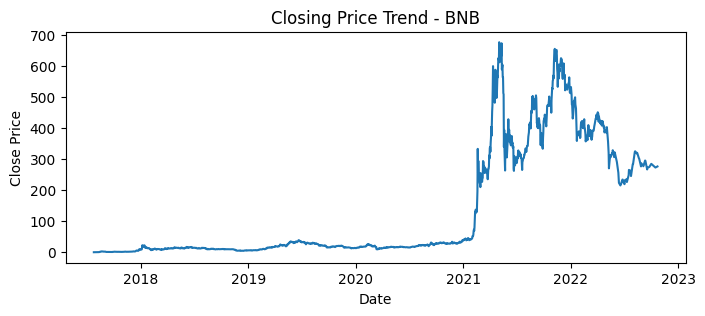

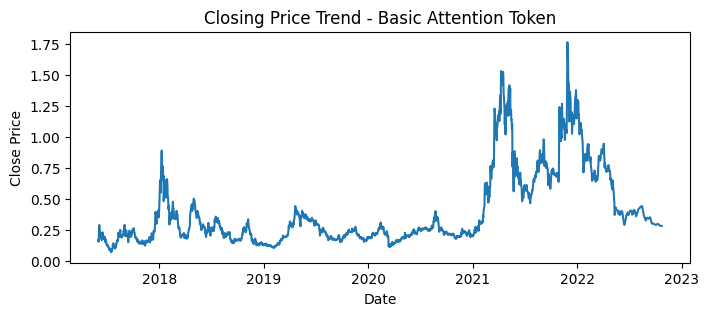

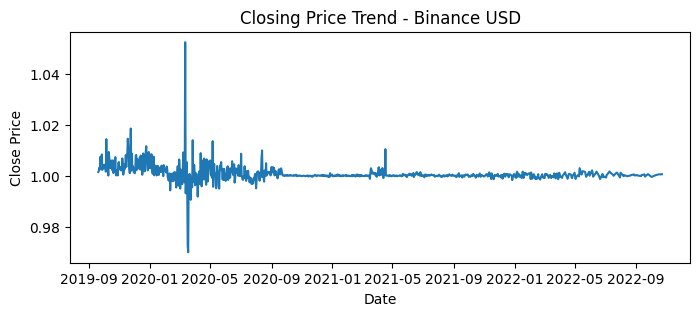

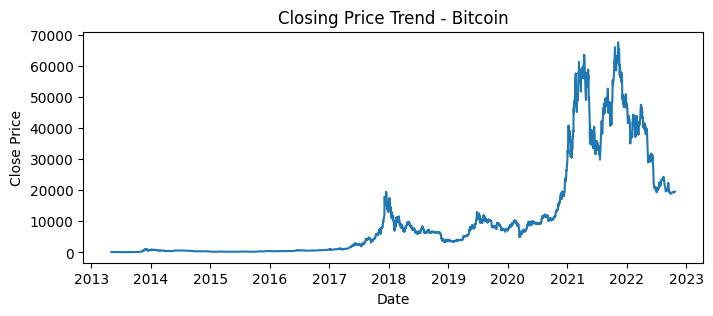

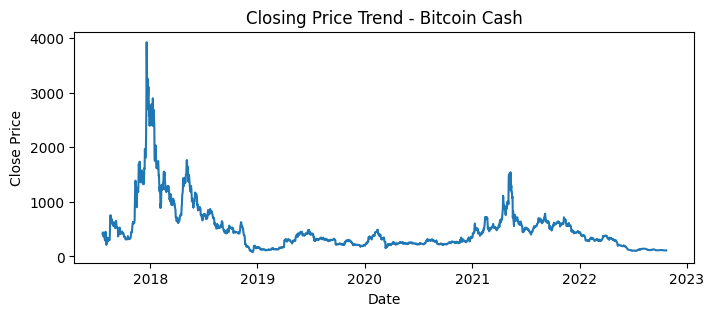

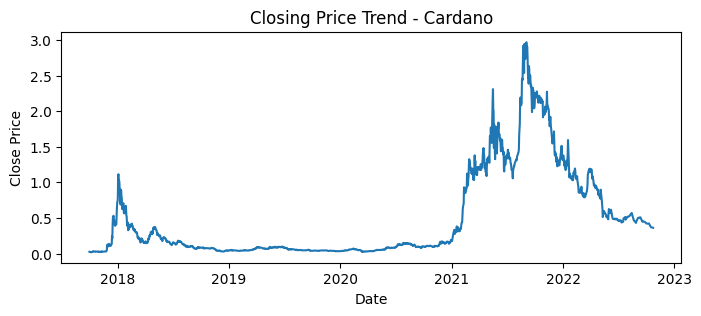

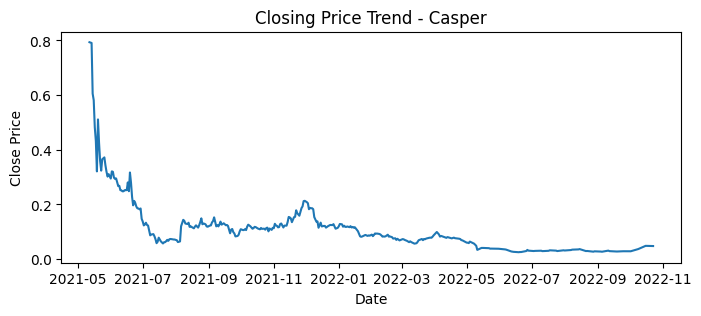

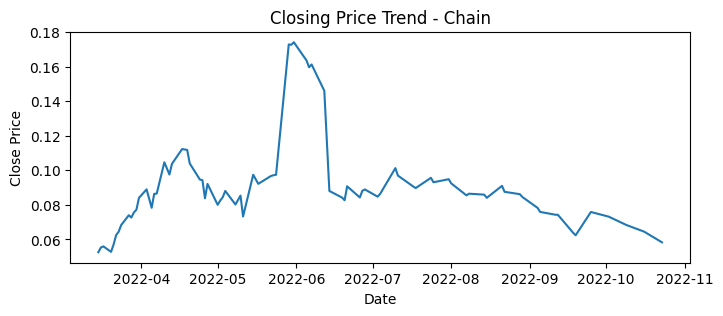

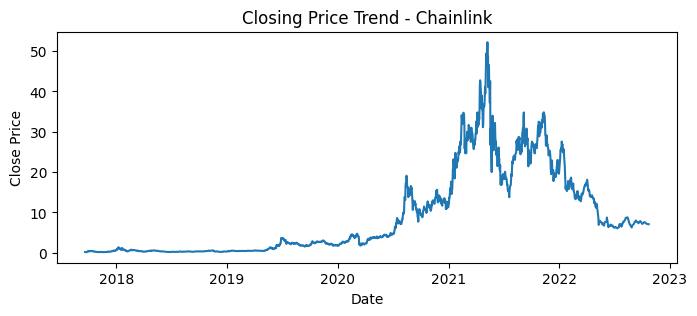

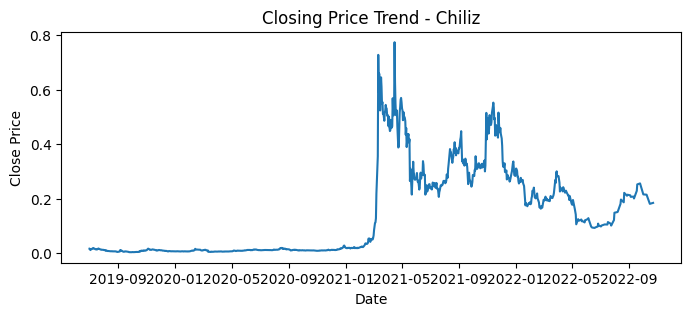

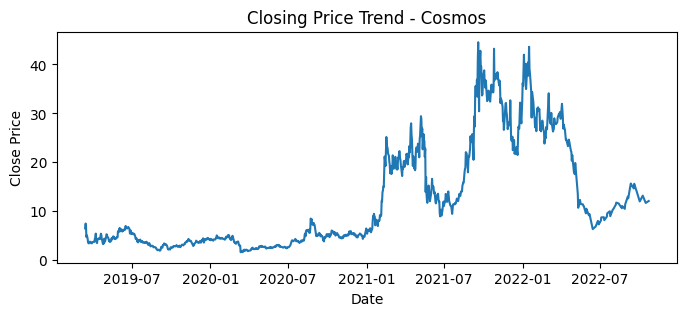

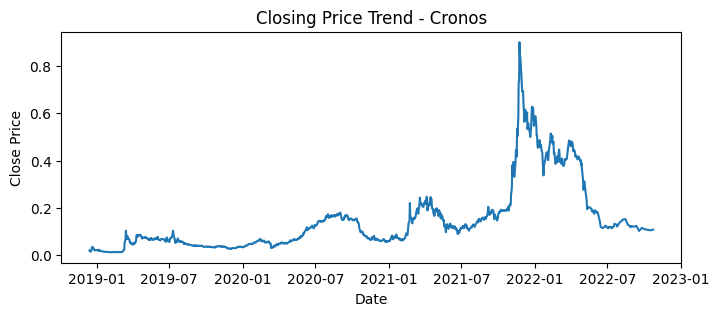

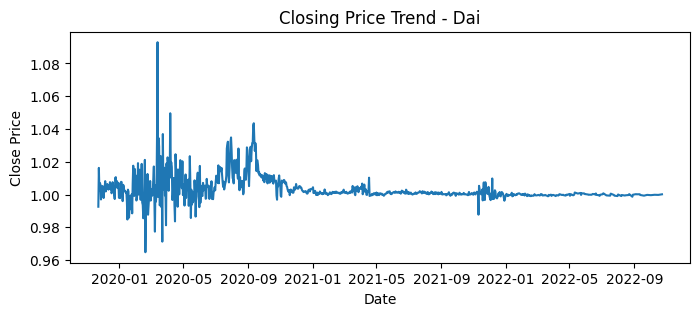

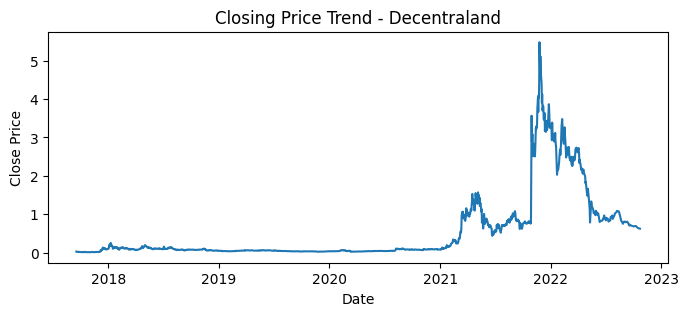

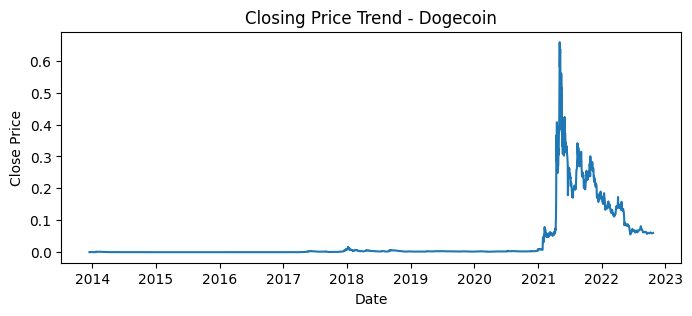

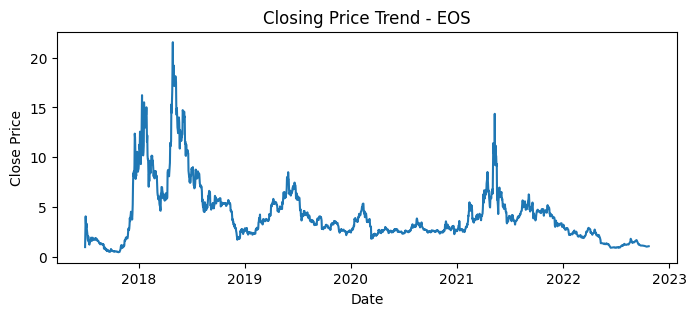

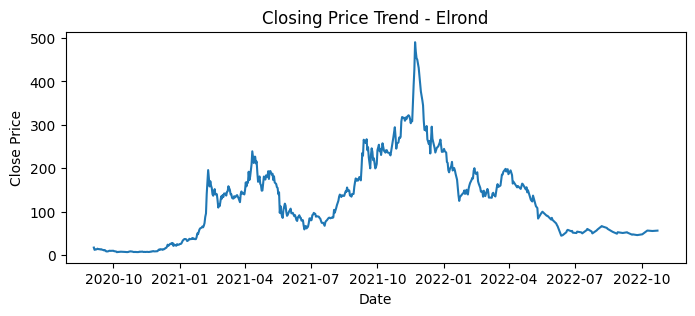

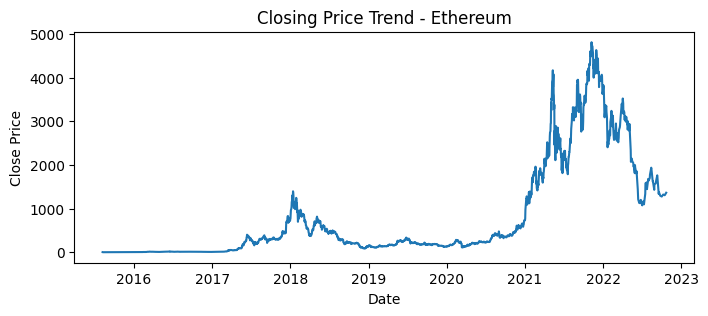

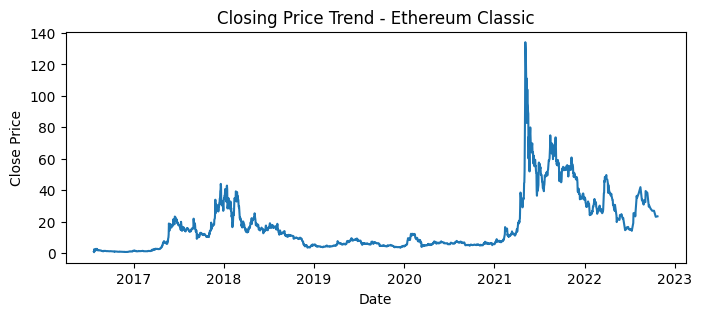

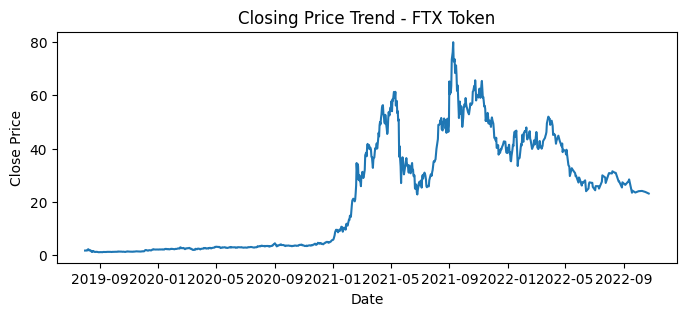

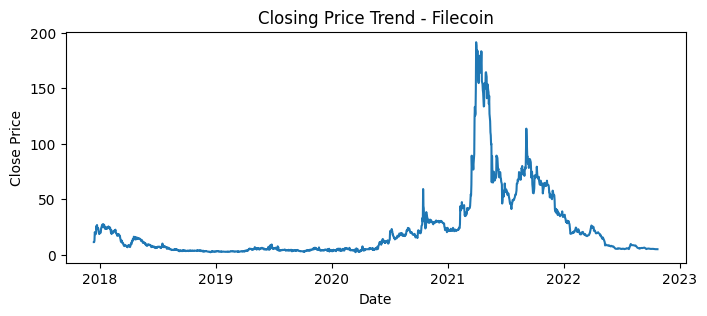

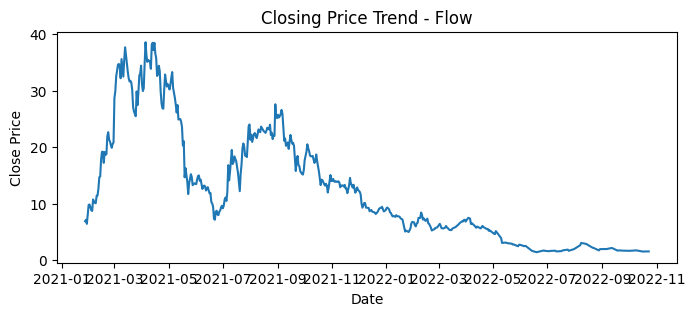

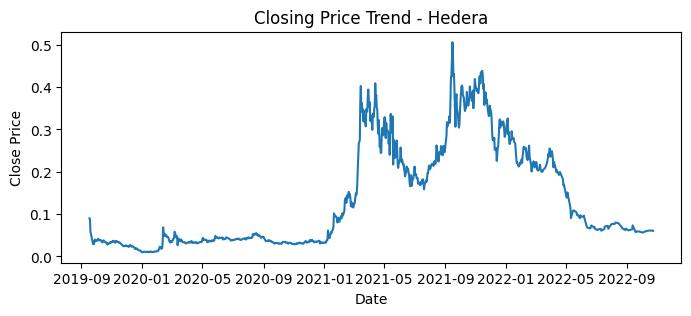

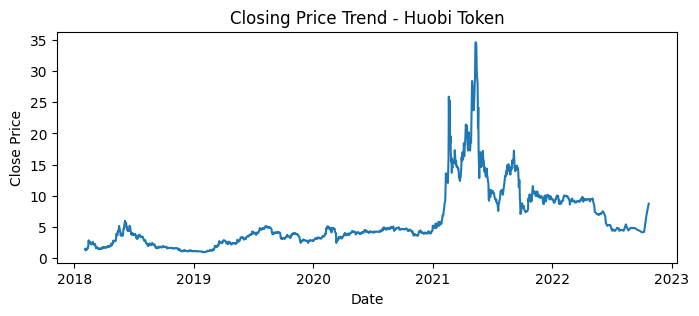

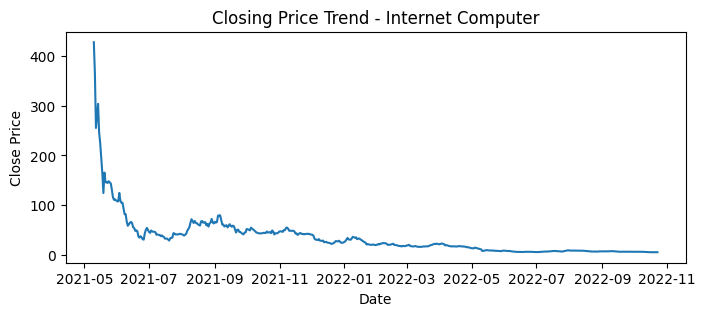

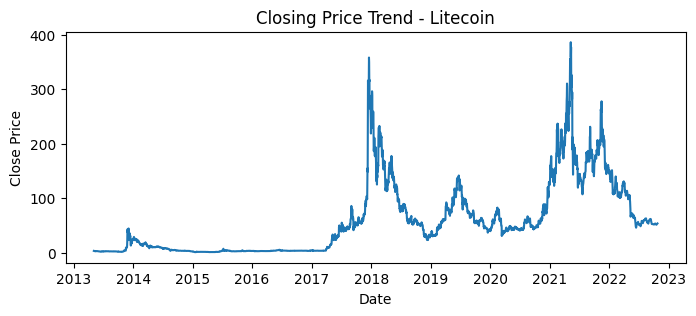

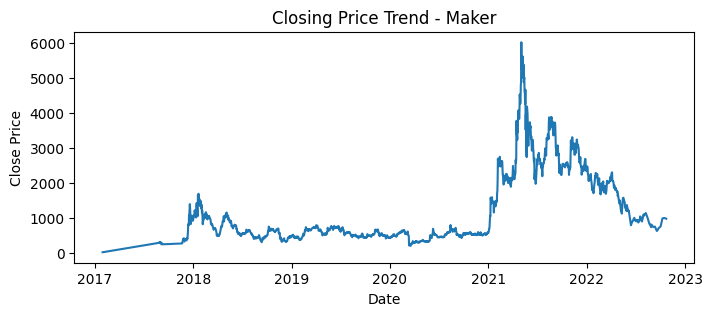

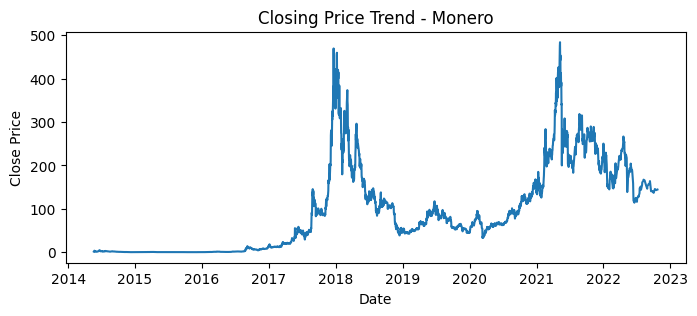

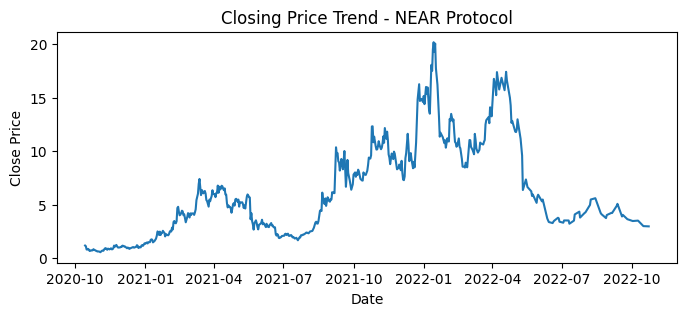

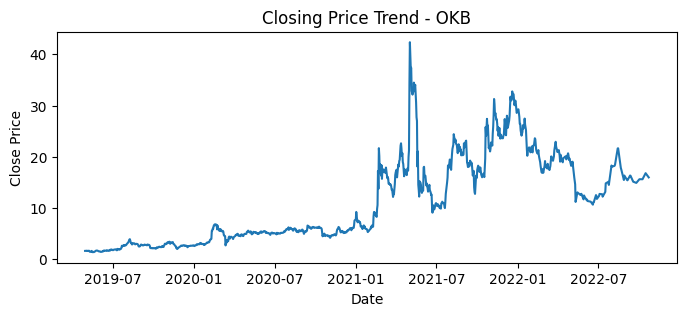

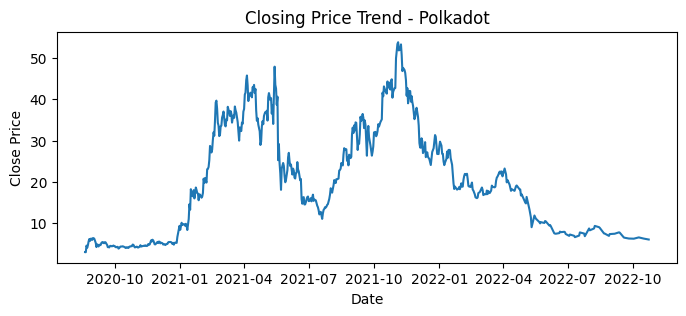

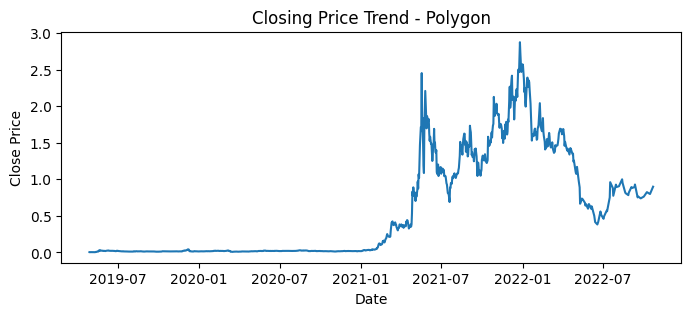

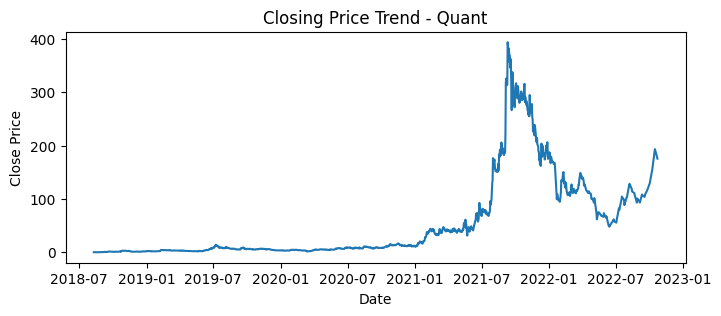

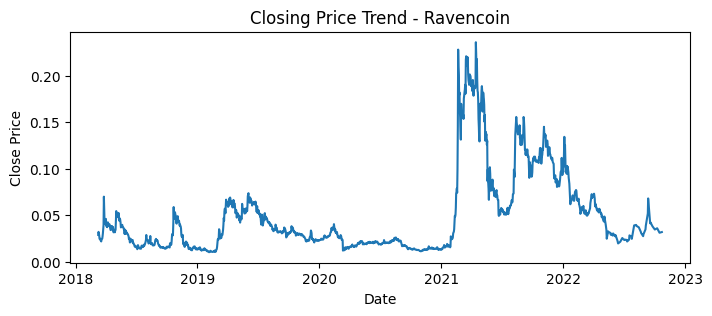

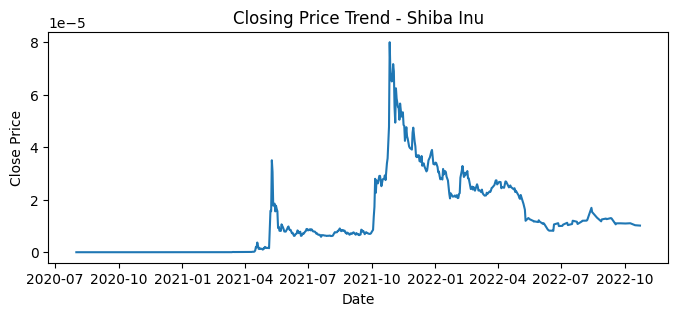

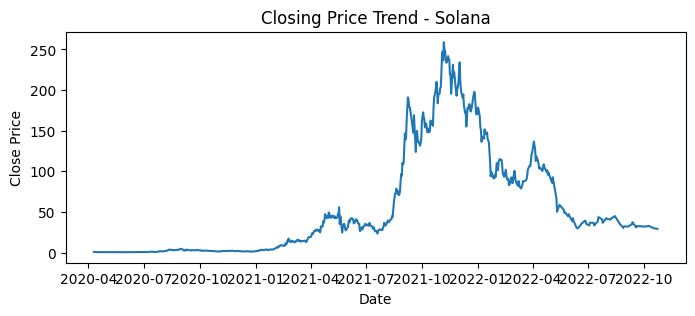

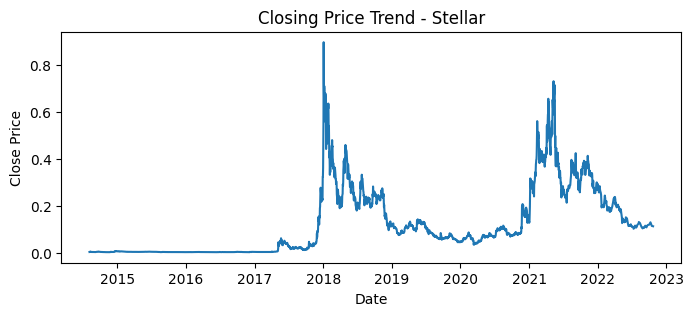

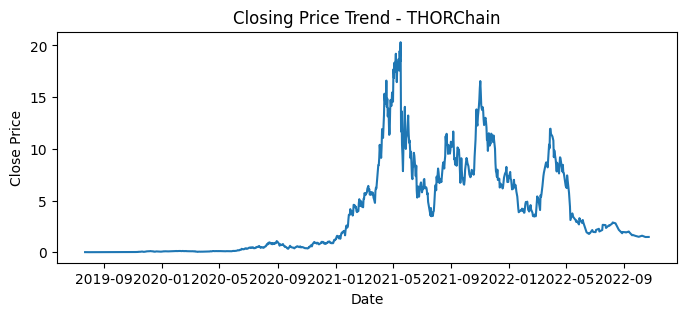

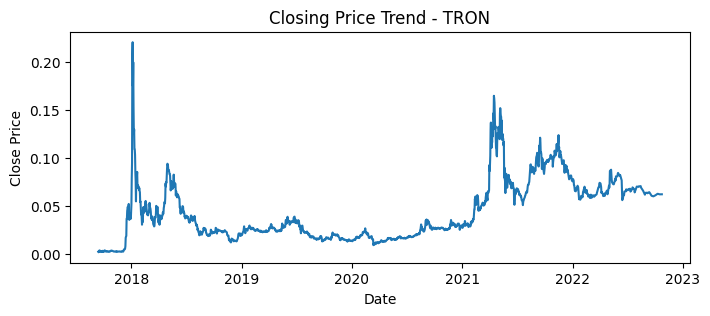

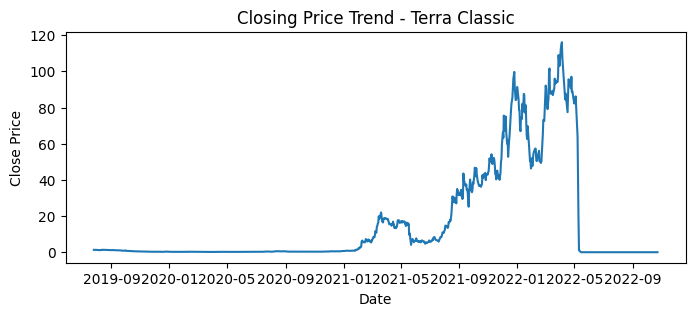

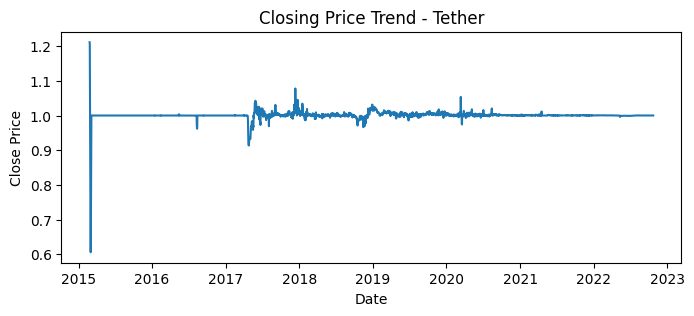

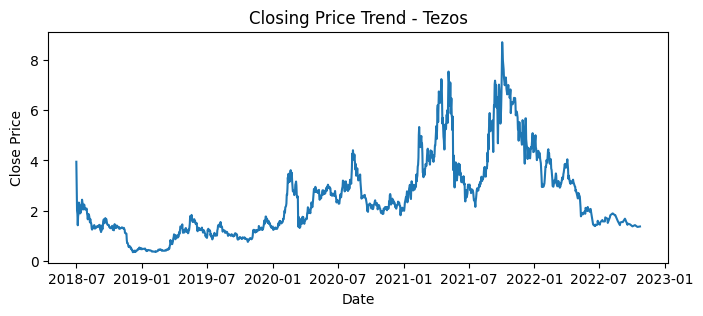

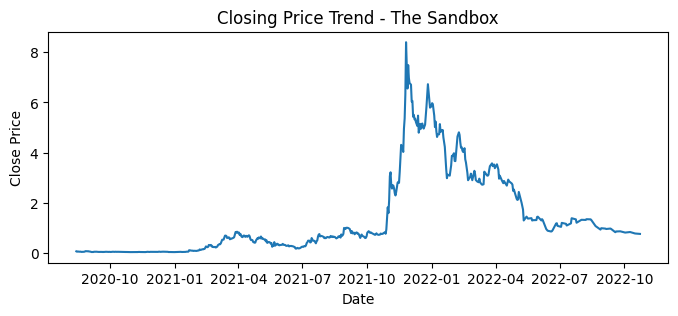

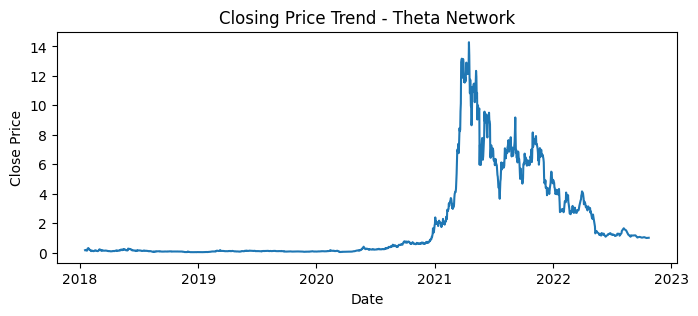

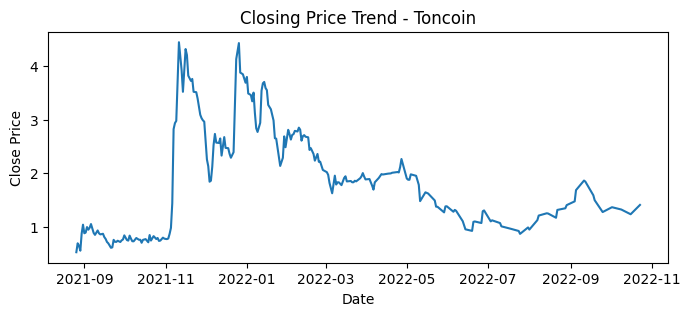

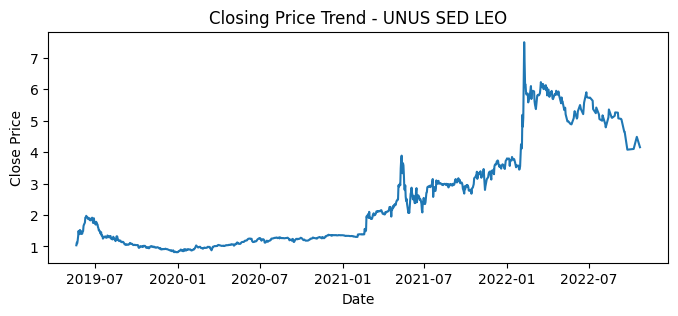

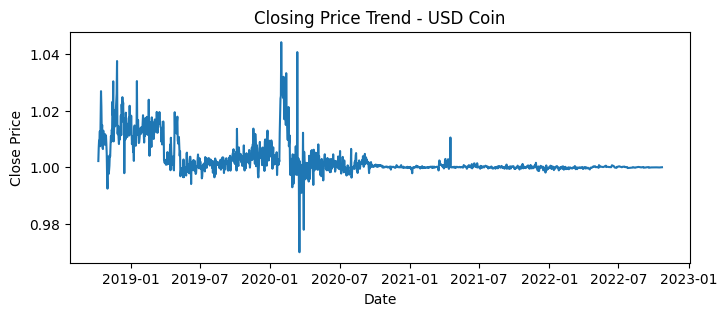

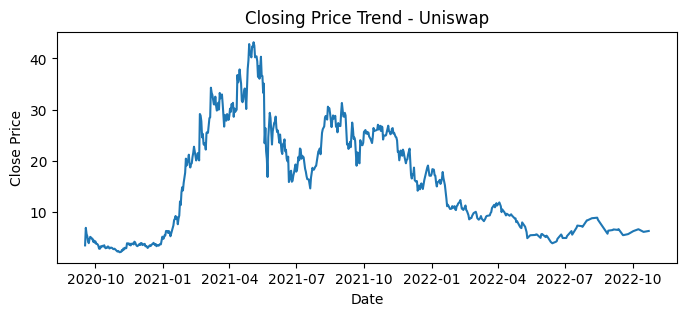

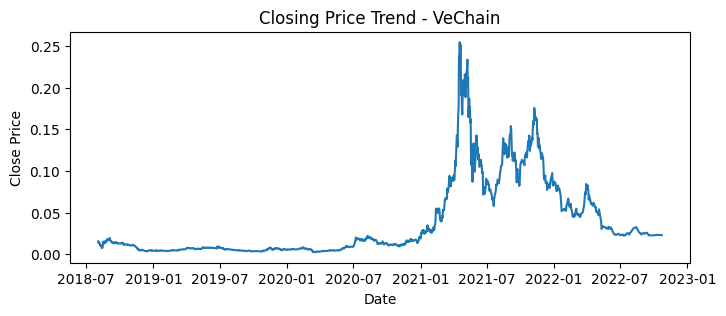

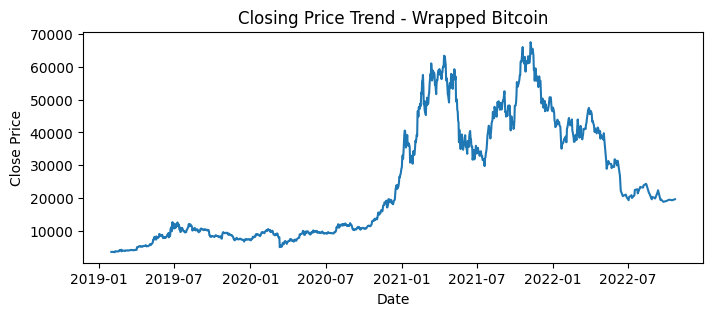

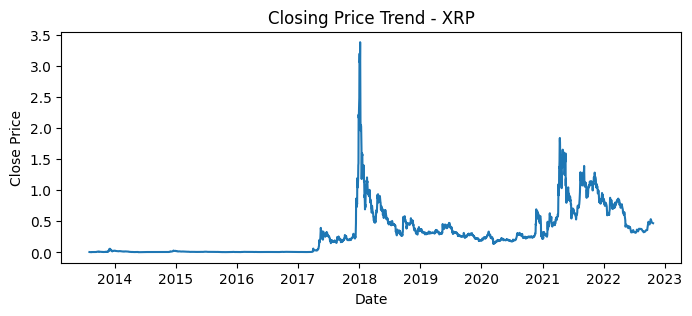

In [10]:
for crypto in df["crypto_name"].unique():
    temp = df[df["crypto_name"] == crypto]
    plt.figure(figsize=(8,3))
    plt.plot(temp["date"], temp["close"])
    plt.title(f"Closing Price Trend - {crypto}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()


The closing price trend was visualized to understand long-term market
movement for a all of the cryptocurrencies.

### 2. Volume vs Marketcap (Liquidity)

This scatter plot illustrates the relationship between trading volume
and market capitalization across cryptocurrencies. It provides insight
into market liquidity by showing how trading activity varies with the
size of the asset.

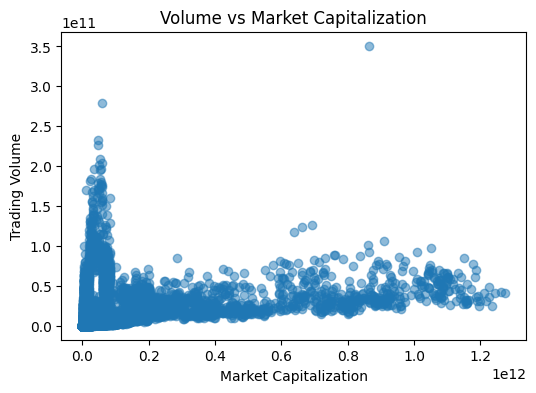

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df["marketCap"], df["volume"], alpha=0.5)
plt.xlabel("Market Capitalization")
plt.ylabel("Trading Volume")
plt.title("Volume vs Market Capitalization")
plt.show()

The plot shows that cryptocurrencies with larger market capitalizations
generally exhibit higher trading volumes, although the relationship is
not strictly linear. Significant dispersion in volume values indicates
varying levels of liquidity and trading intensity across assets and
time periods.

### 3. Correlation Analysis

This heatmap shows the pairwise correlations between raw market features
(Open, High, Low, Close, Volume, and Market Capitalization) to understand
their linear relationships prior to feature engineering.

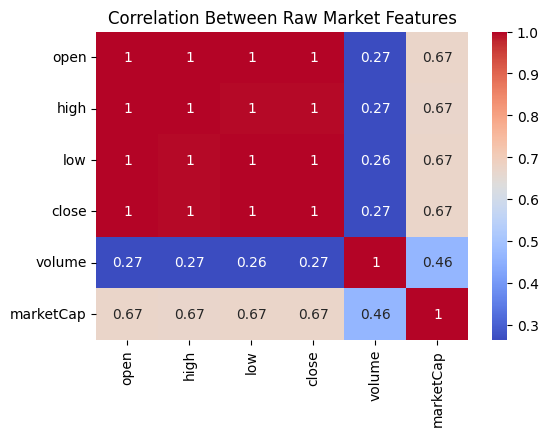

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["open", "high", "low", "close", "volume", "marketCap"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Raw Market Features")
plt.show()


The correlation matrix indicates a very strong positive correlation
among Open, High, Low, and Close prices, which is expected as these
values are derived from the same trading period. Trading volume shows
only a weak to moderate correlation with price variables, suggesting
that price levels and trading activity are not strongly linearly
dependent.

Market capitalization exhibits a moderate positive correlation with
price features and volume, reflecting its dependence on both asset
price and circulating supply. These observations highlight potential
multicollinearity among price-based variables and motivate the use of
derived features rather than raw prices for modeling volatility.

---
# Feature Engineering
---

### 1. Log returns

Log returns were computed from closing prices to transform raw price changes into relative returns. This helps stabilize variance and is a
standard approach in financial time-series analysis.

Since the dataset contains multiple cryptocurrencies, log returns were
calculated separately for each cryptocurrency to prevent cross-asset
contamination.


In [13]:
df["log_return"] = np.log(
    df["close"] / df.groupby("crypto_name")["close"].shift(1)
)

### 2. Rolling Volatility

Volatility was defined as the rolling standard deviation of log returns
using a 14-day window. This captures short-term fluctuations in market
risk and serves as the target variable for prediction.

In [14]:
df["rolling_volatility"] = (
    df.groupby("crypto_name")["log_return"]
    .rolling(window=14)
    .std()
    .reset_index(level=0, drop=True)
)

### 3. Volume to Market Cap Ratio (Liquidity Ratio)

The volume-to-market capitalization ratio was computed as a liquidity
indicator to measure trading activity relative to the size of the
cryptocurrency. Higher values of this ratio may indicate increased
market activity and potential volatility.

In [15]:
df["volume_marketcap_ratio"] = df["volume"] / df["marketCap"]
df["volume_marketcap_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)

### 4. Moving Averages

A rolling moving average of closing prices was calculated to capture
short-term price trends and momentum.

In [16]:
df["ma_close"] = (
    df.groupby("crypto_name")["close"]
      .rolling(window=14)
      .mean()
      .reset_index(level=0, drop=True)
)

### 5. Bollinger Bands

Bollinger Band width was used as a technical indicator to quantify market
uncertainty. Wider bands indicate increased price variability and higher
volatility.

In [17]:
rolling_mean = (
    df.groupby("crypto_name")["close"]
      .rolling(14)
      .mean()
      .reset_index(level=0, drop=True)
)

rolling_std = (
    df.groupby("crypto_name")["close"]
      .rolling(14)
      .std()
      .reset_index(level=0, drop=True)
)

df["bollinger_width"] = (2 * rolling_std) / rolling_mean

### 6. ATR (Average True Range)

The Average True Range (ATR) was calculated to measure price range
volatility by accounting for intraday price movements and gaps from the
previous closing price. ATR was computed separately for each
cryptocurrency using a 14-day rolling window, preserving the integrity
of the time-series structure.

In [18]:
df["high_low"] = df["high"] - df["low"]
df["high_close"] = np.abs(df["high"] - df.groupby("crypto_name")["close"].shift(1))
df["low_close"] = np.abs(df["low"] - df.groupby("crypto_name")["close"].shift(1))


df["true_range"] = df[["high_low", "high_close", "low_close"]].max(axis=1)

df["ATR_14"] = (
    df.groupby("crypto_name")["true_range"]
    .rolling(14)
    .mean()
    .reset_index(level=0, drop=True)
)

Rows with missing values generated due to rolling window calculations
were removed, as these observations lack sufficient historical data.

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

open                      0
high                      0
low                       0
close                     0
volume                    0
marketCap                 0
timestamp                 0
crypto_name               0
date                      0
log_return                0
rolling_volatility        0
volume_marketcap_ratio    0
ma_close                  0
bollinger_width           0
high_low                  0
high_close                0
low_close                 0
true_range                0
ATR_14                    0
dtype: int64

### Dropping Irrelevant and Intermediate Columns

After feature engineering, several columns were no longer required for
model training. These include identifiers, timestamp-related fields,
and intermediate variables used only during feature computation.

To ensure a clean and concise modeling dataset, such columns were
removed, retaining only the final engineered features and the target
variable.


In [21]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date', 'log_return', 'rolling_volatility',
       'volume_marketcap_ratio', 'ma_close', 'bollinger_width', 'high_low',
       'high_close', 'low_close', 'true_range', 'ATR_14'],
      dtype='object')

In [22]:
drop_cols = [
    "open", "close",
    "high", "low",
    "volume",
    "marketCap",
    "timestamp",
    "date",
    "crypto_name",
    "log_return",
    "high_low",
    "high_close",
    "low_close",
    "true_range"
]

df_model = df.drop(columns=drop_cols, errors="ignore")

print(df_model.columns)

Index(['rolling_volatility', 'volume_marketcap_ratio', 'ma_close',
       'bollinger_width', 'ATR_14'],
      dtype='object')


---
# Model Selection
---

### 1. Feature and Target Selection

The target variable (y) for the model is rolling volatility. Input features (X)
were selected from the engineered variables, including liquidity,
trend, and volatility-based indicators, to capture factors influencing
cryptocurrency price fluctuations.

In [23]:
X = df_model.drop(columns="rolling_volatility")
y = df_model["rolling_volatility"]

### 2. Train-Test Split

A chronological train-test split was performed using
train_test_split with shuffling disabled to preserve the temporal
ordering of the data and prevent information leakage.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### 3. Importing Regression Models and Evaluation Metrics

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 4. Comparing different regression models

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR())
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor())
    ]),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)
results_df["Rank"] = results_df.index + 1

results_df


,Model,RMSE,MAE,R2,Rank
0,Random Forest,0.015733,0.009088,0.852628,1
1,Gradient Boosting,0.018400,0.011573,0.798441,2
2,Decision Tree,0.021380,0.011819,0.727868,3
3,Linear Regression,0.021396,0.015415,0.727459,4
4,KNN,0.034360,0.015831,0.297137,5
5,SVR,0.082989,0.072950,-3.100298,6


### Model Comparison and Selection

The table above presents the performance comparison of multiple regression models evaluated for cryptocurrency volatility prediction. Models were ranked based on RMSE, where lower values indicate better predictive accuracy.

Scale-sensitive models such as Linear Regression, SVR, and KNN were trained using standardized features, while tree-based models were trained on unscaled features due to their scale-invariant nature.

Among all evaluated models, the Random Forest Regressor achieved the best overall performance across RMSE, MAE, and r2 score, and was therefore selected as the final model for subsequent optimization and deployment.

---
# Model Training
---

### Hyperparameter Tuning

RandomizedSearchCV was used to tune the Random Forest model. A
time-aware cross-validation strategy (TimeSeriesSplit) was applied to
preserve temporal ordering and prevent information leakage during model
selection.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf,
    param_grid,
    n_iter=10,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies tha

In [28]:
best_params = search.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': None}

In [29]:
best_rfr_model = search.best_estimator_
best_rfr_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

---
# Final Model
---
After model evaluation, the final Random Forest model was retrained on
the dataset using the optimal hyperparameters. This step
ensures that the model benefits from all available historical
information before deployment or future use.

In [30]:
y_pred = best_rfr_model.predict(X_test)

---
# Model Evaluation
---
The best-performing model obtained from hyperparameter optimization was
evaluated on the held-out test dataset. Model performance was assessed
using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and r2
score to measure prediction accuracy and explanatory power.

In [31]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Random Forest Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Best Random Forest Performance
MAE: 0.008907916731725155
RMSE: 0.015362969820628344
R2: 0.8594848146137466


## Final Model Training and Deployment Preparation

After evaluating the tuned Random Forest model on a held-out test set, the final model was retrained on the complete dataset using the optimal hyperparameters. This step allows the model to leverage all available historical information before deployment or future inference.

In [32]:
final_model = RandomForestRegressor(
    **best_params,
    random_state=42
)

final_model.fit(X, y)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",4
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### Saving the trained model and feature names

In [33]:
import joblib

joblib.dump(final_model, "rf_volatility_model.pkl", compress=3)

['rf_volatility_model.pkl']

In [34]:
import pickle

with open("model_features.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

---